1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов, типы активации, тип оптимизатора) на датасет from sklearn.datasets import load_boston.

In [ ]:
from sklearn.datasets import load_boston
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np


In [ ]:
boston = load_boston()
data = pd.DataFrame(boston.data)
features = list(boston.feature_names)
target = 'PRICE'
data.columns = features
data['PRICE'] = boston.target
x_train, x_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.20, random_state=42)

In [ ]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [ ]:
len(features)

13

In [ ]:
model_1_hidden = Sequential([
                    Dense(13, activation='relu', input_shape=(len(features),)),
                    # Dense(13, activation='linear'),
                    Dense(1) #, activation='linear')
])

In [ ]:
model_1_hidden.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

In [ ]:
model_1_hidden.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 13)                182       
                                                                 
 dense_3 (Dense)             (None, 1)                 14        
                                                                 
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_1_hidden.fit(x_train, y_train, epochs=1000, validation_split = 0.1)

Epoch 1/1000
12/12 [==============================] - 1s 23ms/step - loss: 11993.9160 - mae: 106.6028 - mse: 11993.9160 - val_loss: 7748.9263 - val_mae: 86.1129 - val_mse: 7748.9263
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 6047.4644 - mae: 75.3516 - mse: 6047.4644 - val_loss: 3525.9424 - val_mae: 57.5740 - val_mse: 3525.9424
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 2650.3403 - mae: 48.9251 - mse: 2650.3403 - val_loss: 1342.5514 - val_mae: 34.0961 - val_mse: 1342.5514
Epoch 4/1000
12/12 [==============================] - 0s 4ms/step - loss: 983.3025 - mae: 28.6650 - mse: 983.3025 - val_loss: 496.0533 - val_mae: 20.1115 - val_mse: 496.0533
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 385.8956 - mae: 17.1460 - mse: 385.8956 - val_loss: 248.7026 - val_mae: 13.0724 - val_mse: 248.7026
Epoch 6/1000
12/12 [==============================] - 0s 4ms/step - loss: 223.1149 - mae: 12.2425 - mse: 223.1149 

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

(0.0, 500.0)

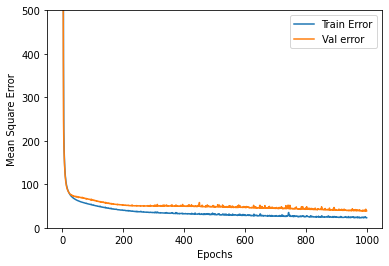

In [ ]:
plt.figure()
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error')
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label = 'Val error')
plt.legend()
plt.ylim([0, 500])

In [ ]:
# evaluate model on test data

mse, _, _ = model_1_hidden.evaluate(x_test, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 3ms/step - loss: 23.1502 - mae: 3.3787 - mse: 23.1502
Root Mean Square Error on test set: 4.811


In [ ]:
models = []
mses = []
rmses = []

In [ ]:
models.append('model_1_hidden')
mses.append(mse)
rmses.append(rmse)

In [ ]:
# normalize train data
x_train_mean = np.mean(x_train, axis=0)
x_train_std = np.std(x_train, axis=0)
x_train = (x_train - x_train_mean) / x_train_std

In [ ]:
# normalize test data
x_test_mean = np.mean(x_test, axis=0)
x_test_std = np.std(x_test, axis=0)
x_test = (x_test - x_test_mean)/x_test_std 

In [ ]:
model_1_hidden_norm = Sequential([
                    Dense(13, activation='relu', input_shape=(len(features),)),
                    # Dense(13, activation='linear'),
                    Dense(1) #, activation='linear')
])

model_1_hidden_norm.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

history = model_1_hidden_norm.fit(x_train, y_train, epochs=1000, validation_split = 0.1)

Epoch 1/1000
12/12 [==============================] - 1s 38ms/step - loss: 629.2442 - mae: 23.3445 - mse: 629.2442 - val_loss: 619.7278 - val_mae: 23.4706 - val_mse: 619.7278
Epoch 2/1000
12/12 [==============================] - 0s 7ms/step - loss: 621.7977 - mae: 23.1959 - mse: 621.7977 - val_loss: 613.0023 - val_mae: 23.3348 - val_mse: 613.0023
Epoch 3/1000
12/12 [==============================] - 0s 4ms/step - loss: 614.6137 - mae: 23.0500 - mse: 614.6137 - val_loss: 606.4273 - val_mae: 23.2004 - val_mse: 606.4273
Epoch 4/1000
12/12 [==============================] - 0s 5ms/step - loss: 607.6027 - mae: 22.9071 - mse: 607.6027 - val_loss: 600.0175 - val_mae: 23.0681 - val_mse: 600.0175
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 600.6381 - mae: 22.7632 - mse: 600.6381 - val_loss: 593.4675 - val_mae: 22.9335 - val_mse: 593.4675
Epoch 6/1000
12/12 [==============================] - 0s 5ms/step - loss: 593.4265 - mae: 22.6128 - mse: 593.4265 - val_loss: 586

In [ ]:
# evaluate model on test data

mse, _, _ = model_1_hidden_norm.evaluate(x_test, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 3ms/step - loss: 18.0416 - mae: 3.2166 - mse: 18.0416
Root Mean Square Error on test set: 4.248


In [ ]:
models.append('model_1_hidden_norm')
mses.append(mse)
rmses.append(rmse)

In [ ]:
model_2_hidden = Sequential([
                    Dense(13, activation='relu', input_shape=(len(features),)),
                    Dense(13, activation='linear'),
                    Dense(1) #, activation='linear')
])

model_2_hidden.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

history = model_2_hidden.fit(x_train, y_train, epochs=1000, validation_split = 0.1)

Epoch 1/1000
12/12 [==============================] - 1s 23ms/step - loss: 590.7949 - mae: 22.5030 - mse: 590.7949 - val_loss: 567.6567 - val_mae: 22.3357 - val_mse: 567.6567
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 567.8578 - mae: 21.9552 - mse: 567.8578 - val_loss: 545.1891 - val_mae: 21.8118 - val_mse: 545.1891
Epoch 3/1000
12/12 [==============================] - 0s 5ms/step - loss: 545.1409 - mae: 21.3897 - mse: 545.1409 - val_loss: 521.6462 - val_mae: 21.2581 - val_mse: 521.6462
Epoch 4/1000
12/12 [==============================] - 0s 5ms/step - loss: 520.4976 - mae: 20.7894 - mse: 520.4976 - val_loss: 496.6074 - val_mae: 20.6548 - val_mse: 496.6074
Epoch 5/1000
12/12 [==============================] - 0s 4ms/step - loss: 493.9722 - mae: 20.1233 - mse: 493.9722 - val_loss: 468.9845 - val_mae: 19.9842 - val_mse: 468.9845
Epoch 6/1000
12/12 [==============================] - 0s 5ms/step - loss: 464.7673 - mae: 19.3891 - mse: 464.7673 - val_loss: 437

In [ ]:
# evaluate model on test data

mse, _, _ = model_2_hidden.evaluate(x_test, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 4ms/step - loss: 17.5443 - mae: 2.9995 - mse: 17.5443
Root Mean Square Error on test set: 4.189


In [ ]:
models.append('model_2_hidden')
mses.append(mse)
rmses.append(rmse)

In [ ]:
model_2_hidden_500 = Sequential([
                    Dense(13, activation='relu', input_shape=(len(features),)),
                    Dense(500, activation='linear'),
                    Dense(1, )
])

model_2_hidden_500.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

history = model_2_hidden_500.fit(x_train, y_train, epochs=1000, validation_split = 0.1)

Epoch 1/1000
12/12 [==============================] - 2s 27ms/step - loss: 547.3168 - mae: 21.4954 - mse: 547.3168 - val_loss: 468.6374 - val_mae: 20.0539 - val_mse: 468.6374
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 415.8025 - mae: 18.3608 - mse: 415.8025 - val_loss: 330.2292 - val_mae: 16.4158 - val_mse: 330.2292
Epoch 3/1000
12/12 [==============================] - 0s 5ms/step - loss: 278.5896 - mae: 14.3391 - mse: 278.5896 - val_loss: 186.6123 - val_mae: 11.5627 - val_mse: 186.6123
Epoch 4/1000
12/12 [==============================] - 0s 5ms/step - loss: 150.8788 - mae: 9.7345 - mse: 150.8788 - val_loss: 85.0430 - val_mae: 6.6853 - val_mse: 85.0430
Epoch 5/1000
12/12 [==============================] - 0s 5ms/step - loss: 86.3895 - mae: 7.2932 - mse: 86.3895 - val_loss: 55.0593 - val_mae: 5.3056 - val_mse: 55.0593
Epoch 6/1000
12/12 [==============================] - 0s 6ms/step - loss: 68.1401 - mae: 6.4660 - mse: 68.1401 - val_loss: 49.4776 - val_ma

In [ ]:
# evaluate model on test data

mse, _, _ = model_2_hidden_500.evaluate(x_test, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 4ms/step - loss: 22.4050 - mae: 3.3198 - mse: 22.4050
Root Mean Square Error on test set: 4.733


In [ ]:
models.append('model_2_hidden_500')
mses.append(mse)
rmses.append(rmse)

In [ ]:
model_2_hidden_relu = Sequential([
                    Dense(13, activation='relu', input_shape=(len(features),)),
                    Dense(13, activation='relu'),
                    Dense(1, )
])

model_2_hidden_relu.compile(optimizer='adam',
              loss='mse',
              metrics=['mae', 'mse'])

history = model_2_hidden_relu.fit(x_train, y_train, epochs=1000, validation_split = 0.1)

Epoch 1/1000
12/12 [==============================] - 1s 22ms/step - loss: 642.0862 - mae: 23.5235 - mse: 642.0862 - val_loss: 625.4796 - val_mae: 23.5450 - val_mse: 625.4796
Epoch 2/1000
12/12 [==============================] - 0s 5ms/step - loss: 627.5609 - mae: 23.2319 - mse: 627.5609 - val_loss: 612.4656 - val_mae: 23.2855 - val_mse: 612.4656
Epoch 3/1000
12/12 [==============================] - 0s 6ms/step - loss: 615.1729 - mae: 22.9809 - mse: 615.1729 - val_loss: 600.6677 - val_mae: 23.0470 - val_mse: 600.6677
Epoch 4/1000
12/12 [==============================] - 0s 6ms/step - loss: 603.6436 - mae: 22.7445 - mse: 603.6436 - val_loss: 588.4662 - val_mae: 22.8008 - val_mse: 588.4663
Epoch 5/1000
12/12 [==============================] - 0s 5ms/step - loss: 591.4045 - mae: 22.4931 - mse: 591.4045 - val_loss: 575.9633 - val_mae: 22.5492 - val_mse: 575.9633
Epoch 6/1000
12/12 [==============================] - 0s 5ms/step - loss: 577.7869 - mae: 22.2227 - mse: 577.7869 - val_loss: 562

In [ ]:
# evaluate model on test data

mse, _, _ = model_2_hidden_relu.evaluate(x_test, y_test)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 4ms/step - loss: 15.8596 - mae: 3.0026 - mse: 15.8596
Root Mean Square Error on test set: 3.982


In [ ]:
models.append('model_2_hidden_relu')
mses.append(mse)
rmses.append(rmse)

In [ ]:
import pandas as pd
mse_rmse_data = {'Models': models, 'MSE': mses, 'RMSE': rmses}
mse_rmse_df = pd.DataFrame(mse_rmse_data)
print(mse_rmse_df)

                Models        MSE      RMSE
0       model_1_hidden  23.150249  4.811471
1  model_1_hidden_norm  18.041643  4.247546
2       model_2_hidden  17.544262  4.188587
3   model_2_hidden_500  22.404982  4.733390
4  model_2_hidden_relu  15.859646  3.982417


### 1.1 Вывод: В ходе обучения модели удалось снизить средне квадратичную ошибку до 15.85. Точность модели увеличилась после нормализации данных и ипользование функции активации RELU в скрытых слоях.

### 1.2 Для меня оказалось полезной команда tf.image (позволяет удобно обрабатывать изображения). Также мне понравился набор команд для отладки tf.debugging. 